# Data recording sheet

| Testing information | |
|---|---|
| Experiment | Rock vs No Rock |
| Description | Test effect of bicycle lean on maximal power output |
| Date | September 8, 2020 |
| Location | Locomotion Laboratory  |
| Subject | EG |
| Calibration factor | 311 |

---
## Protocol

- Charge Garmin, iPad, and IMUs
- Consent form
- Attach IMUs (frame=2050 , crank=2431)
- Set saddle height and handlebar position
- Sanitize bicycle
- Calibrate power meter
- Warm up
- Familiarization trials
- Pmax Test
- Begin experimental trials
  - Sync IMUs with Garmin at start and end of each trial 
- Gift card & signature

| Conditions ||
|---|---|
| 1 | Ad libitum |
| 2 | Self-restricted |
| 3 | Locked |

| Trial order ||
|---|---|
| Warm Up | 5 min at 100 W (3.5 lb) |
| Famil. | Standing and leaning (8.5 lb) |
| Pmax Test | 1, 1, 1 |
| Block 1 | 1, 2, 3 |
| Block 2 | 3, 1, 2 |
| Block 3 | 2, 3, 1 |

---
## Results

| Environmental conditions | |
|---|---|
| Temp. (C) | 20.9 |
| Humidity (%) | 33.6 |
| Pressure (mmHg) | 635 |
| Altitude (m) | 1641 |

| Subject characteristics ||
|---|---|
| Sex | M |
| Age (yrs) | 30 |
| Mass (lb/kg) | 148 / 67.1 |
| Height (ft/m) | 5'10" / 1.78 |

In [ ]:
import numpy as np

mass = 148
listPerc = [0.05, 0.1, 0.18]
listRes = np.array(listPerc)*mass
listRes

array([ 7.4 , 14.8 , 26.64])

### Pmax Test

| Condition | Trial | Hanging Weight (Lbs) | Power  (W) | Cadence (RPM) | 
| --- | --- | --- | --- | --- |
| 1 | 1 | 5% b.w. = 7.5 | 510 | 156 |
| 1 | 2 | 10% b.w. = 15 | 782 | 115 |
| 1 | 3 | 18% b.w. = 26.5 | 573 | 48 |

Predicted maximal power output is 801.0343249427922
Predicted optimal hanging weight is 17.5


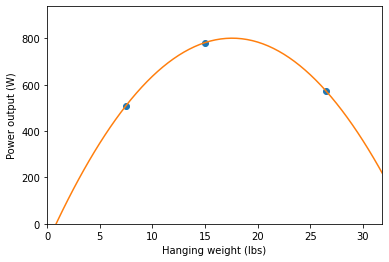

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# set data
x = [7.5, 15, 26.5]
y = [510, 782, 573]

# calculate polynomial 
c = np.polyfit(x,y,2)
poly = np.poly1d(c)

# calculate new x and y values
new_x = np.linspace(0, 50, 101)
new_y = poly(new_x)

# plot the polynomial
plt.plot(x, y, "o", new_x, new_y)
plt.xlim([0, max(x)*1.2])
plt.ylim([0, max(y)*1.2])
plt.xlabel('Hanging weight (lbs)')
plt.ylabel('Power output (W)')

ind = np.argmax(new_y)
xOpt = new_x[ind]
yOpt = max(new_y)

print("Predicted maximal power output is", yOpt)
print("Predicted optimal hanging weight is", xOpt)


### Experimental trials

| Condition | Trial | Power (W) | Cadence (RPM) |
|---|---|---|---|
| 1 | 1 | 908 | 105 |
| 2 | 1 | 787 | 96 |
| 3 | 1 | 808 | 100 |
| 3 | 2 | 829 | 103 |
| 1 | 2 | 859 | 104 |
| 2 | 2 | 683 | 92 |
| 2 | 3 | 774 | 99 |
| 3 | 3 | 821 | 103 |
| 1 | 3 | 899 | 106 |

---
## Data Analysis (Python)


In [ ]:
# create data table
import pandas as pd
import numpy as np

data = pd.DataFrame(np.array([
                              [5, 1, 1, 17.5, 908, 105], 
                              [5, 2, 1, 17.5, 787, 96], 
                              [5, 3, 1, 17.5, 808, 100],
                              [5, 3, 2, 17.5, 829, 103],
                              [5, 1, 2, 17.5, 859, 104],
                              [5, 2, 2, 17.5, 683, 92],
                              [5, 2, 3, 17.5, 774, 99],
                              [5, 3, 3, 17.5, 821, 103],
                              [5, 1, 3, 17.5, 899, 106]
                              ]),
                    columns=['subject','condition','trial','hanging weight','power','cadence'])
data

,condition,trial,power,cadence
0,1,1,908,105
1,2,1,787,96
2,3,1,808,100
3,3,2,829,103
4,1,2,859,104
5,2,2,683,92
6,2,3,774,99
7,3,3,821,103
8,1,3,899,106


In [ ]:
data.groupby('condition')[['power','cadence']].mean()

,power,cadence
condition,,
1,888.666667,105.000000
2,748.000000,95.666667
3,819.333333,102.000000


In [ ]:
data.groupby('condition')[['power','cadence']].std()

,power,cadence
condition,,
1,26.083200,1.000000
2,56.665686,3.511885
3,10.598742,1.732051
